In [30]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df=pd.read_csv("Mall_Customers.csv")
df.columns=['CustomerId','Gender','Age','Annual Income','Spending Score']
df.head()

,CustomerId,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
df.describe()

,CustomerId,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
#checking missing values
df.isnull().sum()


CustomerId        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [35]:
#Droping the column which is not required to our analysis
df.drop(columns={"CustomerId","Gender"},inplace=True)


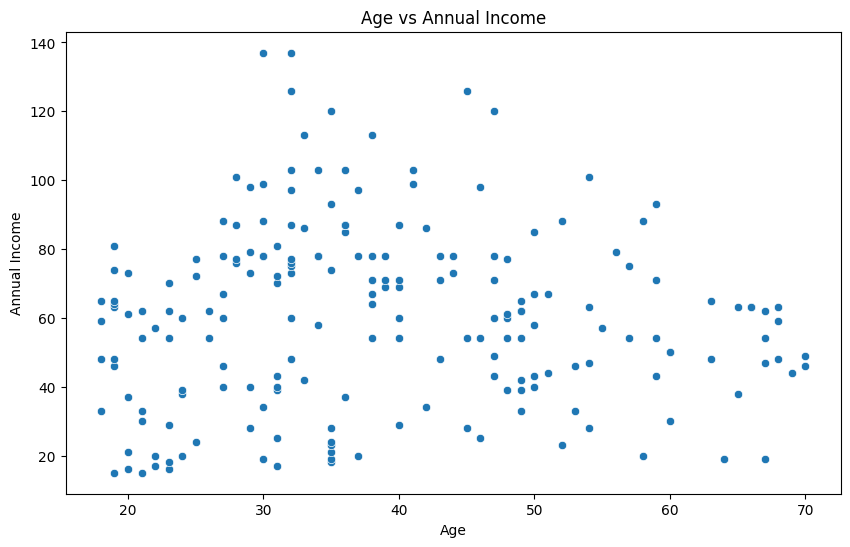

In [36]:
#display age and annual income scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Annual Income",data=df)
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

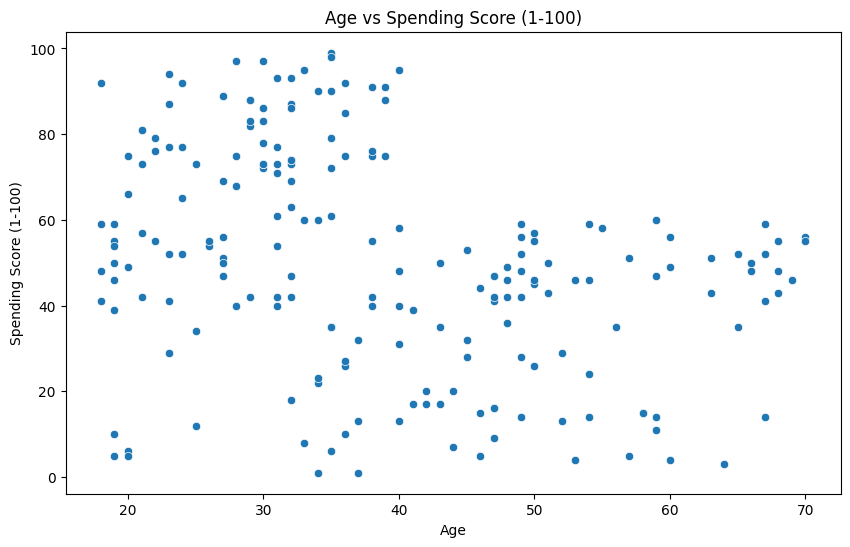

In [37]:
#Display age and spending score scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Spending Score",data=df)
plt.title("Age vs Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

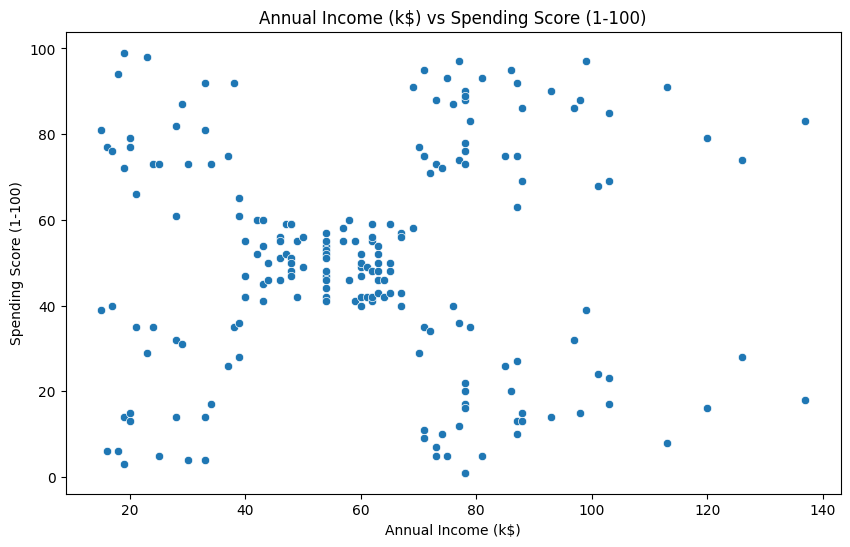

In [38]:
#Display AnnualIncome and spending score scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income",y="Spending Score",data=df)
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

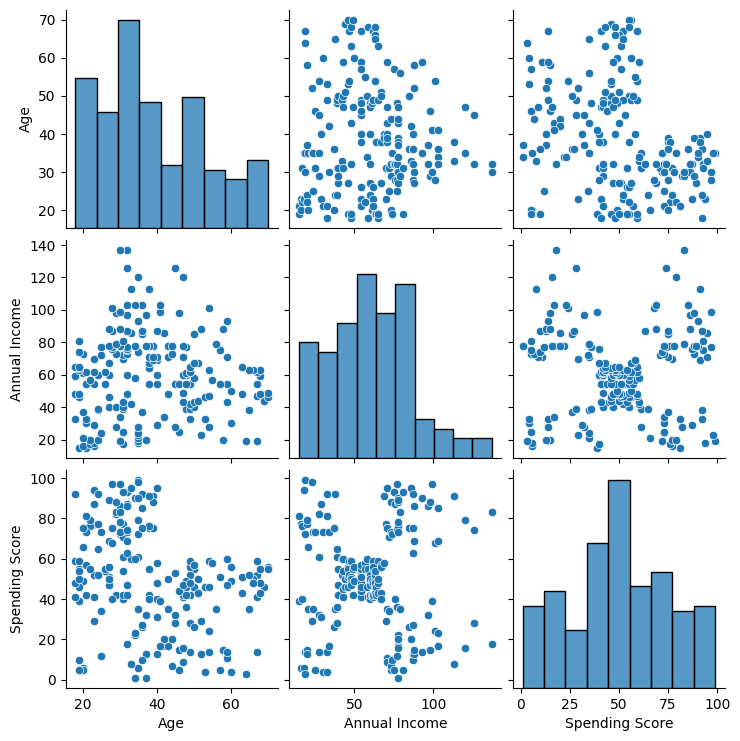

In [39]:
sns.pairplot(df)
plt.show()

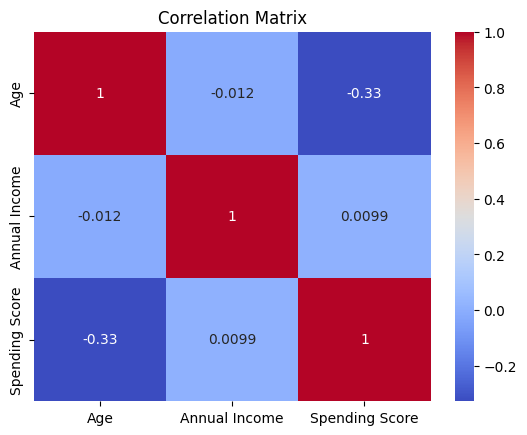

In [40]:
#display the correlation matrix
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [41]:
#scalling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)
df.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Train Model

In [42]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage


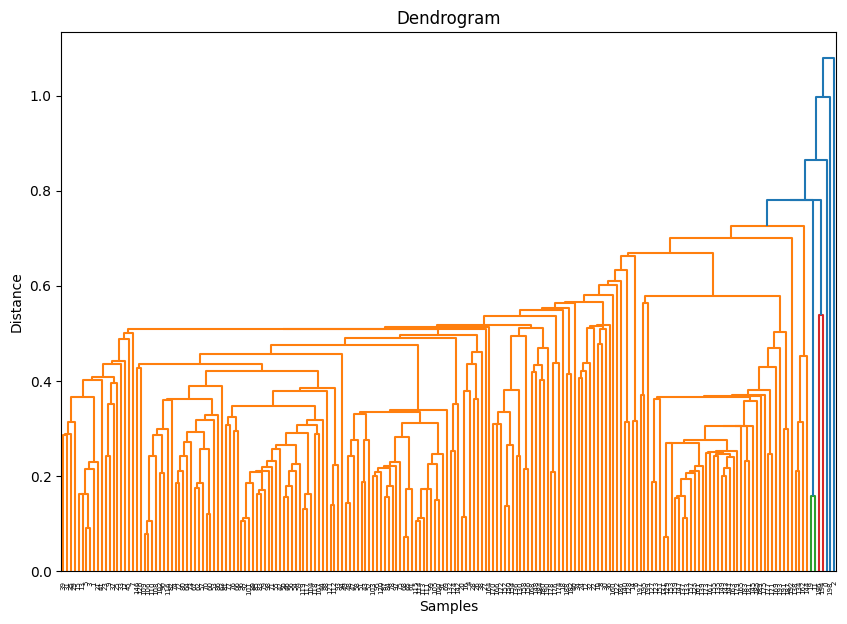

In [43]:
# create the dendrogram 
linked = linkage(df, method='single')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

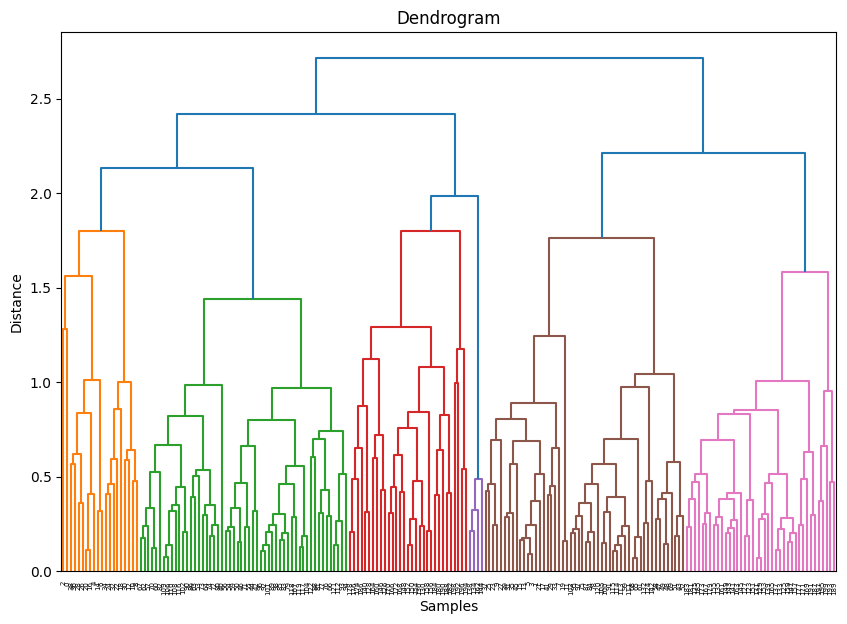

In [44]:
# create the dendrogram 
linked = linkage(df, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

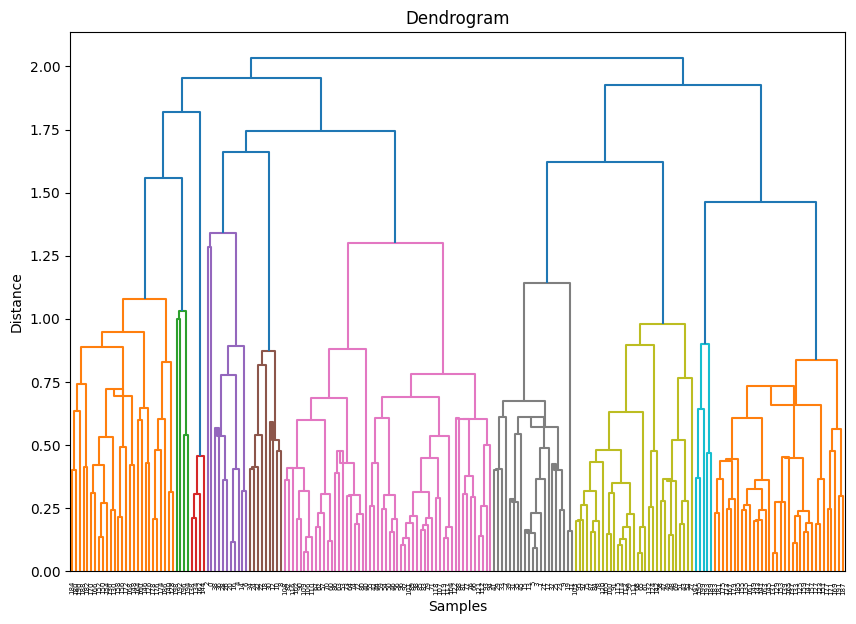

In [45]:
# create the dendrogram 
linked = linkage(df, method='centroid')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

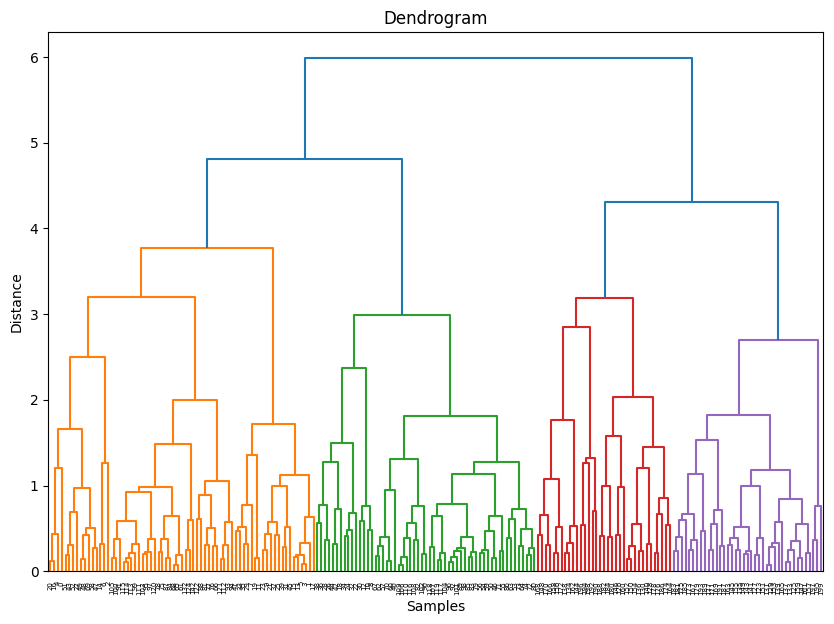

In [46]:
# create the dendrogram 
linked = linkage(df, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [47]:
#Train model
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5)
model.fit(df)
labels=model.labels_
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

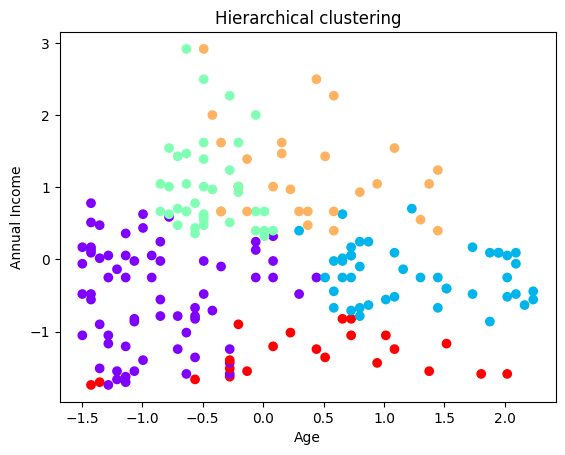

In [48]:
#visualization
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labels,cmap='rainbow')
plt.title("Hierarchical clustering")
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [49]:
df['Cluster']=model.labels_

In [50]:
df.head()

,Age,Annual Income,Spending Score,Cluster
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,4


In [62]:
# save the model
import joblib
joblib.dump(model,"hierarichal_model.pkl")

['hierarichal_model.pkl']

In [63]:
#save dataset
df.to_csv("Hierarchical_clustering.csv",index=False)

In [70]:
# Features and target
X = df.drop(columns=['Cluster'])
y = df['Cluster']


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.95


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[14  2  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.75      1.00      0.86         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         3

    accuracy                           0.95        40
   macro avg       0.95      0.97      0.96        40
weighted avg       0.96      0.95      0.95        40



In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Model
dt = DecisionTreeClassifier(
    criterion='gini',      # or 'entropy'
    max_depth=5,           # control overfitting
    random_state=42
)

# Train
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Detailed performance
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.75      1.00      0.86         6
           2       1.00      1.00      1.00         5
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00         3

    accuracy                           0.93        40
   macro avg       0.94      0.96      0.94        40
weighted avg       0.94      0.93      0.93        40



In [76]:
# save the model
import joblib
joblib.dump(model,"decision_model.pkl")

['decision_model.pkl']